In [1]:
import spacy

In [2]:
nlp=spacy.load('en_core_web_sm')

### Finding Parts of speech

In [3]:
s="Apple is looking at buying U.K. startup for $1 billion"

In [4]:
d=nlp(s)

In [5]:
print(d[0],d[0].pos_)

Apple PROPN


### Finding grained parts of speech

In [6]:
print(d[0],d[0].tag_)

Apple NNP


### Spacy.explain()

In [7]:
print(spacy.explain(d[0].tag_))

noun, proper singular


In [9]:
for token in d:
  print(f'{token.text:{15}}{token.pos_:{15}}{token.tag_:{15}}{spacy.explain(token.tag_)}')

Apple          PROPN          NNP            noun, proper singular
is             AUX            VBZ            verb, 3rd person singular present
looking        VERB           VBG            verb, gerund or present participle
at             ADP            IN             conjunction, subordinating or preposition
buying         VERB           VBG            verb, gerund or present participle
U.K.           PROPN          NNP            noun, proper singular
startup        NOUN           NN             noun, singular or mass
for            ADP            IN             conjunction, subordinating or preposition
$              SYM            $              symbol, currency
1              NUM            CD             cardinal number
billion        NUM            CD             cardinal number


### Visualization of parts of speech

In [12]:
from spacy import displacy

In [14]:
displacy.render(d,jupyter=True)

### Adding functionalities

In [15]:
displacy.render(d,jupyter=True,options={'distance':100,'color':'white','bg':'black','font':'times','compact':True})

### Named entity Recognition

In [16]:
d.ents

(Apple, U.K., $1 billion)

In [17]:
def show_entities(entities):
  if entities.ents:
    for ent in entities.ents:
      print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))
  else:
    print('No Entities Found')


In [18]:
show_entities(d)

Apple - ORG - Companies, agencies, institutions, etc.
U.K. - GPE - Countries, cities, states
$1 billion - MONEY - Monetary values, including unit


In [19]:
# prompt: write code to add new entity for word "Startup" = org

from spacy.matcher import Matcher
from spacy.tokens import Span

# Initialize the matcher with a new pattern
matcher = Matcher(nlp.vocab)
pattern = [{'LOWER': 'startup'}]
matcher.add('Startup_matcher', [pattern])

# Find matches in the document
matches = matcher(d)

# Create a Span for the matched word
span = Span(d, matches[0][1], matches[0][2], label='ORG')

# Add the span to the document's entities
d.ents = list(d.ents) + [span]

# Print the entities
print(d.ents)


(Apple, U.K., startup, $1 billion)


In [20]:
show_entities(d)

Apple - ORG - Companies, agencies, institutions, etc.
U.K. - GPE - Countries, cities, states
startup - ORG - Companies, agencies, institutions, etc.
$1 billion - MONEY - Monetary values, including unit


### finding the specific tag word

In [21]:
doc=nlp("GFG,APPLE,GOOGLE,TODAY")

In [22]:
[ent for ent in doc.ents if ent.label_=='ORG']

[GFG, APPLE, GOOGLE]

In [23]:
### WORD CLOUD

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [29]:
text="""India, officially the Republic of India (ISO: Bhārat Gaṇarājya),[21] is a country in South Asia. It is the seventh-largest country by area; the most populous country as of June 2023;[22][23] and from the time of its independence in 1947, the world's most populous democracy.[24][25][26] Bounded by the Indian Ocean on the south, the Arabian Sea on the southwest, and the Bay of Bengal on the southeast, it shares land borders with Pakistan to the west;[j] China, Nepal, and Bhutan to the north; and Bangladesh and Myanmar to the east. In the Indian Ocean, India is in the vicinity of Srilanka and the Maldives; its Andaman and Nicobar Islands share a maritime border with Thailand, Myanmar, and Indonesia.

"""

In [31]:
wc=WordCloud().generate(text)

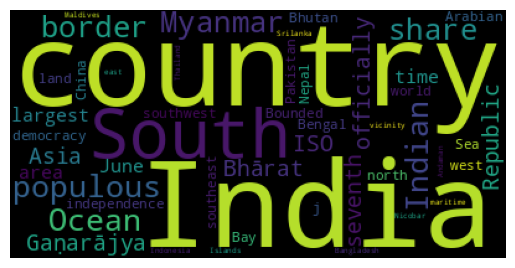

In [32]:
plt.imshow(wc)
plt.axis('off')
plt.show()

### IN Detail & removing Stopwords

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
from nltk.corpus import stopwords

In [43]:
stopword=stopwords.words('english')

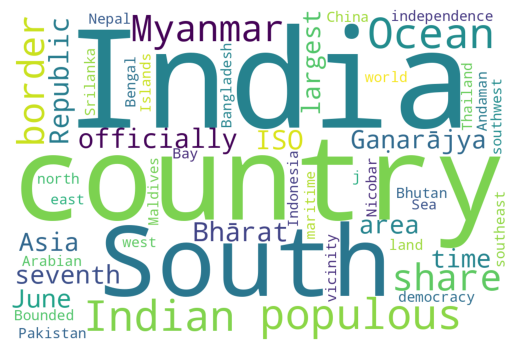

In [49]:
# prompt: wite code to draw a word cloud from text and remove stopwords

wc=WordCloud(width=1080,height=720,margin=2,background_color='white',stopwords=stopword)
wc.generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()
